In [1]:
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram

from Agnes import Agnes
from utils import report
from DBscan import DBscan 

import warnings
warnings.filterwarnings("ignore") 
cmap = 'Spectral'

In [2]:
data = pd.read_csv('datset.csv') 
cat = ['OverTime', 'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department', 'BusinessTravel', 'Attrition']
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)
for i in cat:
    data[i] = (data[i].astype('category').cat.codes).apply(np.int64)
X, y = data.drop(['Attrition'], axis=1), data['Attrition']

In [3]:
X, y = np.array(X), list(y)

data_x = data.drop(['Attrition'], axis=1)
X_standardized = np.array((data_x - data_x.mean()) / data_x.std())
X_normalized = np.array(((data_x - data_x.min()) / (data_x.max() - data_x.min())))

# Centroids

In [4]:
agnes = Agnes('hamming') 
dist_matrix = np.load('Agnes//Distances_Hamming.npy')
start = time.time()
cluster_id_H, clusters_H, distances_H, nb_clusters_H = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Hamming done', end)

agnes = Agnes('manhattan') 
dist_matrix = np.load('Agnes//Distances_Manhattan.npy')
start = time.time()
cluster_id_M, clusters_M, distances_M, nb_clusters_M = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan done', end)

agnes = Agnes('manhattan') 
dist_matrix = np.load('Agnes//Distances_Manhattan_Norm.npy')
     
start = time.time()
cluster_id_N, clusters_N, distances_N, nb_clusters_N = agnes.cluster(X_normalized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Norm done', end)

agnes = Agnes('manhattan') 
dist_matrix = np.load('Agnes//Distances_Manhattan_Std.npy')
     
start = time.time()
cluster_id_S, clusters_S, distances_S, nb_clusters_S = agnes.cluster(X_standardized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Std done', end)

Hamming done 110.66636562347412
Manhattan done 233.09001684188843
Manhattan Norm done 245.45794868469238
Manhattan Std done 282.67643094062805


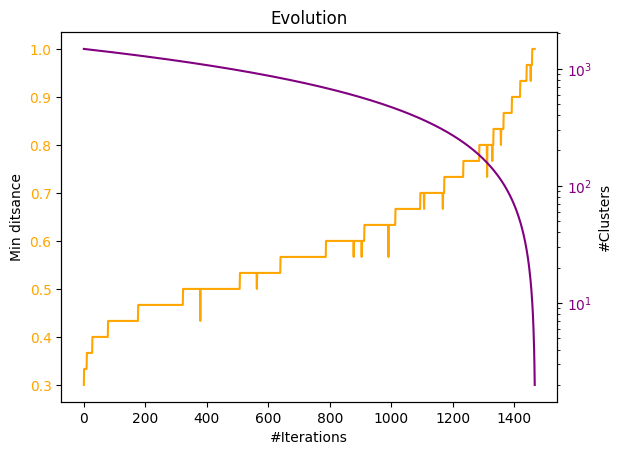

In [5]:
fig, ax = plt.subplots()
ax.plot(distances_H, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_H, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

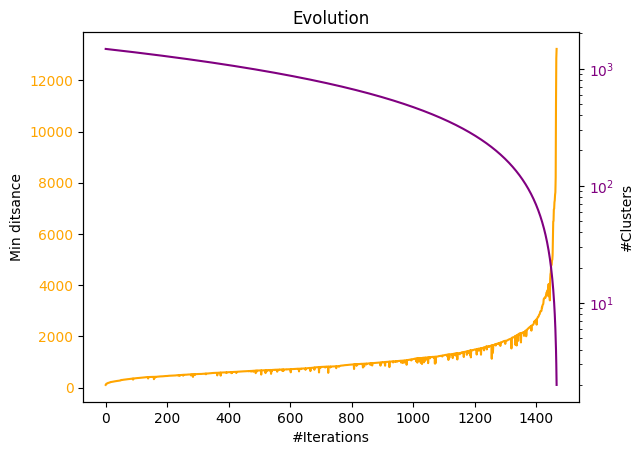

In [6]:
fig, ax = plt.subplots()
ax.plot(distances_M, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_M, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

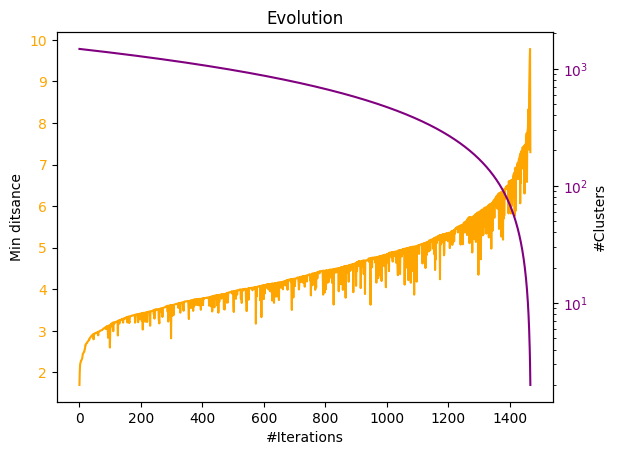

In [7]:
fig, ax = plt.subplots()
ax.plot(distances_N, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_N, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

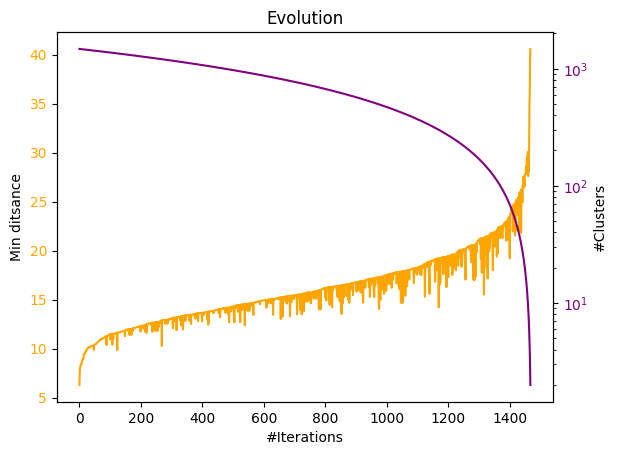

In [8]:
fig, ax = plt.subplots()
ax.plot(distances_S, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_S, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [9]:
report(y, [1 if i in cluster_id_H[1] else 0 for i in range(len(X))])

Classification Report
Class 0
Precision: 0.835
Recall: 0.822
F1-Score: 0.828

Class 1
Precision: 0.144
Recall: 0.156
F1-Score: 0.150

Accuracy: 0.556


In [10]:
report(y, [1 if i in cluster_id_M[1] else 0 for i in range(len(X))])

Classification Report
Class 0
Precision: 0.839
Recall: 0.716
F1-Score: 0.773

Class 1
Precision: 0.163
Recall: 0.287
F1-Score: 0.208

Accuracy: 0.478


In [11]:
report(y, [1 if i in cluster_id_N[1] else 0 for i in range(len(X))])

Classification Report
Class 0
Precision: 0.840
Recall: 0.582
F1-Score: 0.687

Class 1
Precision: 0.162
Recall: 0.422
F1-Score: 0.234

Accuracy: 0.385


In [12]:
report(y, [1 if i in cluster_id_S[1] else 0 for i in range(len(X))])

Classification Report
Class 0
Precision: 0.845
Recall: 0.582
F1-Score: 0.689

Class 1
Precision: 0.169
Recall: 0.443
F1-Score: 0.245

Accuracy: 0.388
